In [37]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import healpy as hp
import time
import warnings
#from pixell import reproject
#from classy import Class
%matplotlib inline
import pysm3 
import ST

In [38]:
nside_2048 = 2048
nside_1024 = 1024
nside_0256 = 256

In [39]:
lmax_0256 = 3*nside_0256 -1 
lmax_1024 = 3*nside_1024 -1 
lmax_2048 = 3*nside_2048 -1 

In [40]:
ell_0256 = np.arange(0,lmax_0256+1)
ellsc_0256 = 21600/ell_0256
norm_0256 = ell_0256 * (ell_0256+1) / (2*np.pi)

<ipython-input-40-021124972f74>:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0256 = 21600/ell_0256


In [41]:
dl_test_0256 = ell_0256**2 / (1e8 + ell_0256**4) * 2e10

cl_test_0256 = dl_test_0256/ norm_0256
cl_test_0256[0] = 0

<ipython-input-41-cc01de8197f3>:3: RuntimeWarning: invalid value encountered in true_divide
  cl_test_0256 = dl_test_0256/ norm_0256


In [43]:
map_test_0256 = hp.synfast (cl_test_0256 , nside_0256)
map_test_0256 += np.abs (np.min(map_test_0256))
alm_test_0256 = hp.map2alm (map_test_0256)
almsize_0256 = alm_test_0256.shape[0]
mapsize_0256 = map_test_0256.shape[0]

In [44]:
res_0256 = hp.nside2resol (nside_0256 , arcmin = False)
res_0256_arcmin = hp.nside2resol (nside_0256 , arcmin = True)
res_1024 = hp.nside2resol (nside_1024 , arcmin = False)
res_1024_arcmin = hp.nside2resol (nside_1024 , arcmin = True)
res_2048 = hp.nside2resol (nside_2048 , arcmin = False)
res_2048_arcmin = hp.nside2resol (nside_2048 , arcmin = True)

In [45]:
theta_bin = 10000
jmax = int(np.floor(np.log(2*np.pi *0.75 /res_0256 / 2)/np.log(2)))
print(jmax)


9


In [46]:
morlet_l_arr = morlet_arr(res_0256 , jmax , lmax_0256 , theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [47]:
#almTmap = hp.map2alm (Tmap)
alm_delta_0256 = np.zeros(almsize_0256,dtype=np.complex_)
alm_delta_0256[:lmax_0256+1] = 1+0j
map_delta_0256 = hp.alm2map (alm_delta_0256, nside_0256)
#i1_norm = []
#for j in range (jmax ):
#    alm_beam = hp.almxfl(almTmap , morlet_l_arr [j])
#    map_mu1 = hp.alm2map (alm_beam , nside=nside_1024)
#    i1_norm.append (np.abs (map_mu1))

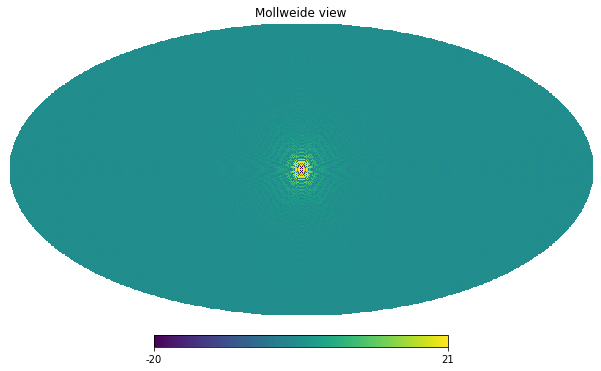

In [52]:

hp.mollview (map_delta_0256, min = -20 , max = 21 , rot= [0,90])  #min (i1_norm[1]) min (i1_norm[1])

In [22]:
theta_arr = np.linspace (0 , np.pi, theta_bin)

In [53]:
S1_test , i1_test = ST.compS1 (map_test_0256 , morlet_l_arr , jmax, nside_0256)

0
1
2
3
4
5
6
7
8


In [54]:
S2_test  , i2_test = ST.compS2 (i1_test , morlet_l_arr , jmax, nside_0256)

0
1
2
3
4
5
6
7
8


In [55]:
S1_delta , i1_delta = ST.compS1 (map_delta_0256 , morlet_l_arr , jmax, nside_0256)
S2_delta , i2_delta = ST.compS2 (i1_delta, morlet_l_arr, jmax, nside_0256)

0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8


In [63]:
S0 =  np.mean (map_test_0256)
print(S0**2)

41758877.53127127


In [127]:
# S1_norm = [np.mean (i1_norm[i]) for i in range (jmax)]
# S1_norm = np.copy (S1_norm)

In [128]:
# S2_norm = np.zeros ((jmax,jmax))
# for j1 in range (jmax):
#     mor = i1_norm[j1]
#     mor_l = hp.map2alm(mor ,lmax_1024)
#     for j2 in range (jmax):
#         f_l = hp.almxfl (mor_l , morlet_l_arr[j2])
#         f = hp.alm2map (f_l , nside=nside_1024)
#         f_abs = np.abs(f)
#         S2_norm[j1,j2] = np.mean (f_abs)
        
        

In [57]:
S2_normalized = S2_test/S2_delta
S1_normalized = S1_test/S1_delta

In [64]:
S1_normalized**2

array([1.07923238e+06, 2.52714422e+08, 3.38113637e+08, 1.92129560e+08,
       3.97461132e+07, 5.13661797e+06, 6.42976080e+05, 4.55481686e+04,
       6.62442780e+03])

In [59]:
I0sqrt =  np.mean (map_test_0256**2)
print (I0sqrt)

43311007.28539194


In [60]:
S2_sum = 0
for i in range (jmax):
    for j in range (i+1 , jmax):
        S2_sum+=S2_normalized[i,j]**2

In [61]:
RHS = S0**2 + np.sum (S1_normalized**2) + S2_sum

In [62]:
(I0sqrt - RHS)/I0sqrt

-20.00444548213428

In [65]:
(I0sqrt - S0**2)/I0sqrt

0.03583684267357543